In [1]:
import mysql.connector
import sqlalchemy as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = '123456'
)

In [3]:
con

In [4]:
c = con.cursor(buffered=True)
query = 'SHOW databases'
c.execute(query)

In [5]:
c

In [6]:
c.fetchall()

[('flask_mysql',),
 ('hotwheels_db',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sql_hr',),
 ('sql_inventory',),
 ('sql_invoicing',),
 ('sql_store',),
 ('sys',),
 ('world',)]

In [7]:
query = 'USE world'
c.execute(query)

In [8]:
query = 'SHOW tables'
c.execute(query)
c.fetchall()

[('city',), ('country',), ('countrylanguage',)]

In [9]:
query = 'SELECT * FROM city'
c.execute(query)
res = c.fetchall()
cols = c.column_names

city_df = pd.DataFrame(res, columns = cols)
city_df

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...,...
4074,4075,Khan Yunis,PSE,Khan Yunis,123175
4075,4076,Hebron,PSE,Hebron,119401
4076,4077,Jabaliya,PSE,North Gaza,113901
4077,4078,Nablus,PSE,Nablus,100231


In [10]:
query = 'SELECT * FROM country'
c.execute(query)
res = c.fetchall()
cols = c.column_names

country_df = pd.DataFrame(res, columns = cols)
country_df

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [11]:
query = 'SELECT * FROM countrylanguage'
c.execute(query)
res = c.fetchall()
cols = c.column_names

countrylanguage_df = pd.DataFrame(res, columns = cols)
countrylanguage_df

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [12]:
country_df[['Name', 'Continent', 'Region','IndepYear','Population']].sort_values('Population', ascending=True)[:10]

,Name,Continent,Region,IndepYear,Population
34,Bouvet Island,Antarctica,Antarctica,NaN,0
100,British Indian Ocean Territory,Africa,Eastern Africa,NaN,0
187,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,NaN,0
11,Antarctica,Antarctica,Antarctica,NaN,0
12,French Southern territories,Antarctica,Antarctica,NaN,0
221,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,NaN,0
93,Heard Island and McDonald Islands,Antarctica,Antarctica,NaN,0
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000


In [13]:
df2 = city_df.groupby(['CountryCode'])['Population'].mean().reset_index(name='mean').sort_values(['mean'],ascending=False).head(10)
df2

,CountryCode,mean
181,SGP,4017733.0
89,HKG,1650316.5
215,URY,1236000.0
77,GIN,1090610.0
213,UGA,890800.0
185,SLE,850000.0
115,LBR,850000.0
133,MLI,809552.0
12,AUS,808119.0
136,MNG,773700.0


In [14]:
df3 = countrylanguage_df.groupby(['Language'])['Percentage'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
df3

,Language,count
109,English,60
14,Arabic,33
388,Spanish,28
118,French,25
76,Chinese,19
134,German,19
351,Russian,17
175,Italian,15
87,Creole English,14
122,Ful,12


In [15]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL


In [16]:
by_continent = country_df.groupby('Continent').sum()
by_continent

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
Continent,,,,,,,
Africa,30250377.0,100960.0,784475000,2996.6,580375.0,553264.0,123255.0
Antarctica,13132101.0,0.0,0,0.0,0.0,0.0,0.0
Asia,31881005.0,85001.0,3705025700,3439.5,7655392.0,8251969.0,103979.0
Europe,23049133.9,75271.0,730074600,3306.5,9498865.0,9382001.0,102294.0
North America,24214470.0,43783.0,482993000,2700.7,9688627.2,9288175.0,58934.0
Oceania,8564294.0,27542.0,30401150,1394.3,419774.7,469058.0,67448.0
South America,17864926.0,22117.0,345780000,922.3,1511874.0,1520641.0,24633.0


In [17]:
continent_label = list(by_continent.index)
continent_label

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America']

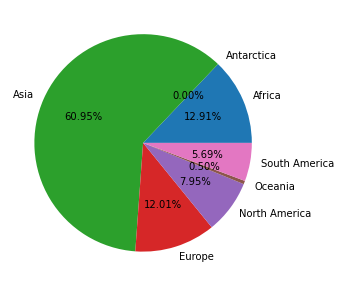

In [18]:
plt.figure(figsize=(10,5))
plt.pie(by_continent['Population'], labels=continent_label, autopct='%.2f%%')
plt.show()

###
Gambar diatas merupakan Pie Chart yang menampilkan presentase populasi dari setiap benua

2.1 Berdasarkan Pie Chart diatas, benua ASIA yang menjadi penyumbang populasi terbanyak dengan 60.95%

2.2 Berdasarkan Pie Chart diatas, 13.64% presentase populasi manusia yang berada di benua Amerika (5.69% dari South America + 7.95% dari North America)

In [19]:
asia = country_df.loc[country_df['Continent'] == 'Asia']
asia.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,2441000,74.1,37966.0,36846.0,Al-Imarat al-Â´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1813.0,1627.0,Hajastan,Republic,Robert KotÂšarjan,126.0,AM
16,AZE,Azerbaijan,Asia,Middle East,86600.0,1991.0,7734000,62.9,4127.0,4100.0,AzÃ¤rbaycan,Federal Republic,HeydÃ¤r Ã„liyev,144.0,AZ
21,BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD


In [20]:
toptenAsia = asia.groupby(['Name'])['Population'].sum().reset_index(name='total_population').sort_values(['total_population'],ascending=False).head(10)
toptenAsia

,Name,total_population
8,China,1277558000
13,India,1013662000
14,Indonesia,212107000
33,Pakistan,156483000
4,Bangladesh,129155000
18,Japan,126714000
49,Vietnam,79832000
35,Philippines,75967000
15,Iran,67702000
45,Turkey,66591000


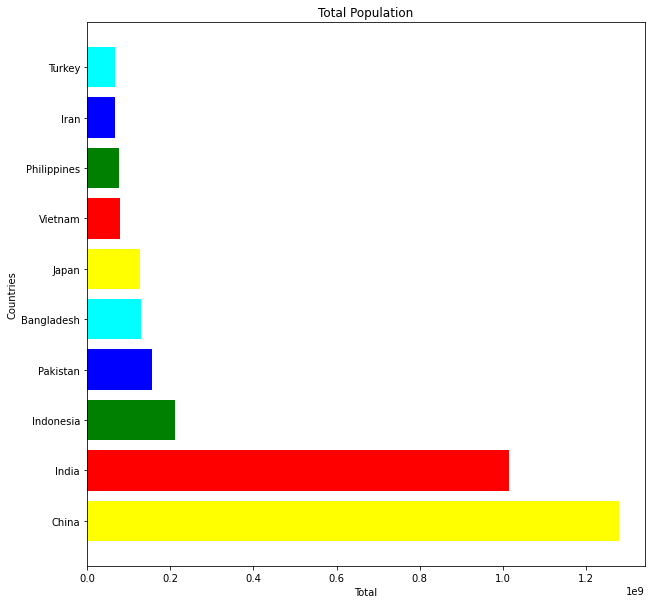

In [21]:
plt.figure(figsize=(10,10))
plt.barh(toptenAsia.Name, toptenAsia['total_population'], color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Total')
plt.ylabel('Countries')
plt.title('Total Population')
plt.show()

###
Gambar diatas merupakan Horizontal Bar Plot yang menampilkan total populasi dari 10 negara dalam benua dengan populasi terbanyak (Asia)

3.2 Berdasarkan Horizontal Bar Plot diatas, China adalah negara dengan populasi terbanyak

3.3 Berdasarkan Horizontal Bar Plot diatas, Turkey adalah negara yang menjadi urutan ke 10 (urutan terakhir)

3.4 Berdasarkan Horizontal Bar Plot diatas, negara yang berada di urutan ke-3 adalah Indonesia dengan total populasi 21.2107.000

In [22]:
asia.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,2441000,74.1,37966.0,36846.0,Al-Imarat al-Â´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1813.0,1627.0,Hajastan,Republic,Robert KotÂšarjan,126.0,AM
16,AZE,Azerbaijan,Asia,Middle East,86600.0,1991.0,7734000,62.9,4127.0,4100.0,AzÃ¤rbaycan,Federal Republic,HeydÃ¤r Ã„liyev,144.0,AZ
21,BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD


In [23]:
asia.describe()

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
count,5.100000e+01,47.000000,5.100000e+01,51.000000,5.100000e+01,4.500000e+01,51.000000
mean,6.251177e+05,1808.531915,7.264756e+07,67.441176,1.501057e+05,1.833771e+05,2038.803922
std,1.466192e+06,631.614937,2.248504e+08,8.396527,5.431181e+05,6.327974e+05,1133.096342
min,1.800000e+01,-1523.000000,2.860000e+05,45.900000,0.000000e+00,3.830000e+02,1.000000
25%,2.542800e+04,1936.500000,3.191500e+06,62.700000,5.226500e+03,5.924000e+03,1237.000000
50%,1.471810e+05,1948.000000,1.116800e+07,68.500000,1.570600e+04,2.283400e+04,2331.000000
75%,5.006075e+05,1971.000000,3.496450e+07,72.700000,8.574250e+04,1.461710e+05,2902.000000
max,9.572900e+06,1991.000000,1.277558e+09,81.600000,3.787042e+06,4.192638e+06,4074.000000


C:\Users\ella\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


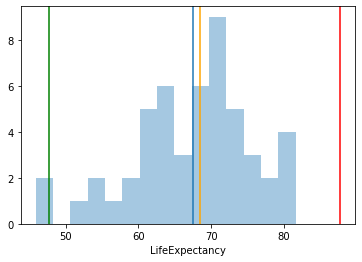

IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia:  10.0
Mean dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia:  67.44117647058825
Median dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia:  68.5
Standard Deviation dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia:  8.39652729336571
Upper Boundaries (Upper Fence) dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia:  87.7
Lower Boundaries (Lower Fence) dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia:  47.7


In [24]:
mean = asia['LifeExpectancy'].mean() 
median = asia['LifeExpectancy'].median()
std = asia['LifeExpectancy'].std()
iqr = asia['LifeExpectancy'].quantile(0.75) - asia['LifeExpectancy'].quantile(0.25)
upper_whis = asia['LifeExpectancy'].quantile(0.75) + (1.5*iqr)
lower_whis = asia['LifeExpectancy'].quantile(0.25) - (1.5*iqr)

sns.distplot(asia['LifeExpectancy'], bins=15, kde=False)
plt.axvline(asia['LifeExpectancy'].mean())
plt.axvline(asia['LifeExpectancy'].median(), color='orange')

plt.axvline(upper_whis, color='red')
plt.axvline(lower_whis, color='green')

plt.show()

print('IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: ', iqr)
print('Mean dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: ', mean)
print('Median dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: ', median)
print('Standard Deviation dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: ', std)
print('Upper Boundaries (Upper Fence) dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: ', upper_whis)
print('Lower Boundaries (Lower Fence) dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia: ', lower_whis)

In [25]:
asia[asia['LifeExpectancy']>upper_whis]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2


In [26]:
asia[asia['LifeExpectancy']<lower_whis]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.0,NaN,885000,46.0,0.0,NaN,Timor Timur,Administrated by the UN,JosÃ© Alexandre GusmÃ£o,1522.0,TP


###
Menurut Distribution Plot tersebut diatas:

4.4 Ada 2 negara terdapat yang Angka Harapan Hidup-nya berada pada outliers, 2 negara tersebut tampilkan dalam bentuk Dataframe diatas (Afghanistan dan East Timor)

In [27]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL


In [28]:
country_df['GNP_million'] = country_df['GNP']*1000000

In [29]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNP_million
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8.280000e+08
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,5.976000e+09
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,6.648000e+09
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,6.320000e+07
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,3.205000e+09


In [30]:
country_df['GNP_perCapita'] = country_df['GNP_million']/country_df['Population']

In [31]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNP_million,GNP_perCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8.280000e+08,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,5.976000e+09,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,6.648000e+09,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,6.320000e+07,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,3.205000e+09,942.314477


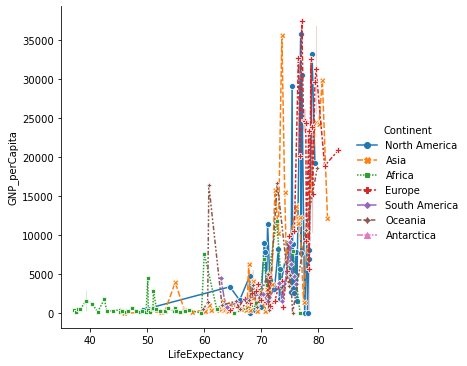

In [32]:
sns.relplot(x='LifeExpectancy', y='GNP_perCapita', hue='Continent',
            kind='line', data=country_df, style='Continent', dashes=True,
           markers=True)

plt.show()

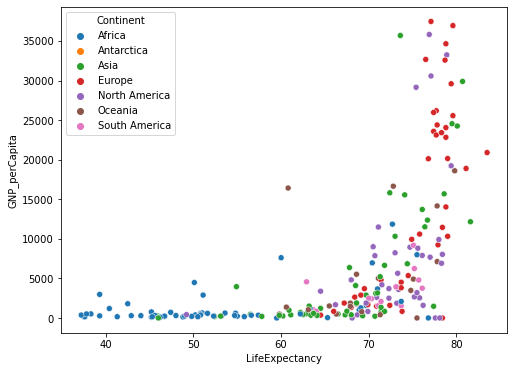

In [33]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=country_df, x='LifeExpectancy', y='GNP_perCapita',
                hue='Continent', hue_order=['Africa', 'Antarctica', 'Asia',
                                            'Europe', 'North America', 'Oceania', 'South America'])
plt.show()

asumsi:
bahwa negara-negara dengan LifeExpectancy yang tinggi akan selalu memiliki GNPperCapita yang tinggi pula.
Dan ini berarti LifeExpectancy dan GNPperCapita memiliki korelasi positif.


###
Dua Gambar diatas merupakan Line Plot and Scatter Plot yang menampilkan hubungan antara LifeExpectancy dan GNPperCapita

6.1 Berdasarkan Line Plot and Scatter Plot diatas, tidak terdapat hubungan antara LifeExpectancy dan GNPperCapita.

6.2 Berdasarkan Line Plot and Scatter Plot diatas, saya tidak setuju dengan asumsi di awal.
Berdasarkan Line Plot,
Hal ini ditunjukkan dengan garis yang tidak memiliki pola di dalam Line Plot. Garis garis tersebut cenderung untuk berhamburan dalam pola alur garis. Hal ini menunjukkan bahwa variabel LifeExpectancy dan GNPperCapita tidak memiliki hubungan / korelasi.
Berdasarkan Scatter Plot,
Hal ini ditunjukkan dengan penyebaran titik titik di dalam Scatter Plot yang cenderung berkumpul di daerah bawah saja dan tidak terdapat perseberan titik titik yang membentuk pola / menggambarkan suatu korelasi.

6.3 Berdasarkan Scatter Plot diatas, benua Europe yang salah satu negaranya mencetak GNP tertinggi, jika dibandingkan dari benua-benua lainnya.

In [34]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNP_million,GNP_perCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8.280000e+08,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,5.976000e+09,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,6.648000e+09,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,6.320000e+07,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,3.205000e+09,942.314477


In [35]:
europe = country_df.loc[country_df['Continent'] == 'Europe']
europe.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNP_million,GNP_perCapita
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,3.205000e+09,942.314477
5,AND,Andorra,Europe,Southern Europe,468.0,1278.0,78000,83.5,1630.0,NaN,Andorra,Parliamentary Coprincipality,,55.0,AD,1.630000e+09,20897.435897
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,211860.0,206025.0,Ã–sterreich,Federal Republic,Thomas Klestil,1523.0,AT,2.118600e+11,26182.060852
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,249704.0,243948.0,BelgiÃ«/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,2.497040e+11,24387.537845
22,BGR,Bulgaria,Europe,Eastern Europe,110994.0,1908.0,8190900,70.9,12178.0,10169.0,Balgarija,Republic,Petar Stojanov,539.0,BG,1.217800e+10,1486.771905


In [36]:
europe_N = europe.dropna(subset=['GNPOld', 'GNP'])

In [37]:
europe_N.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNP_million,GNP_perCapita
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,3.205000e+09,942.314477
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,211860.0,206025.0,Ã–sterreich,Federal Republic,Thomas Klestil,1523.0,AT,2.118600e+11,26182.060852
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,249704.0,243948.0,BelgiÃ«/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,2.497040e+11,24387.537845
22,BGR,Bulgaria,Europe,Eastern Europe,110994.0,1908.0,8190900,70.9,12178.0,10169.0,Balgarija,Republic,Petar Stojanov,539.0,BG,1.217800e+10,1486.771905
39,CHE,Switzerland,Europe,Western Europe,41284.0,1499.0,7160400,79.6,264478.0,256092.0,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH,2.644780e+11,36936.204681


- Problem: apakah terjadi peningkatan GNP yang signifikan di negara-negara eropa antara GNPOld dengan GNP (GNP tahun lalu dengan GNP tahun sekarang)?
- H0 : tidak ada peningkatan yang signifikan antara GNPOld dengan GNP (GNP tahun lalu dengan GNP tahun sekarang) di negara-negara eropa
- H1 : ada peningkatan yang signifikan  antara GNPOld dengan GNP (GNP tahun lalu dengan GNP tahun sekarang) di negara-negara eropa
- alpha = 0.05   

In [38]:
from scipy import stats
import pylab
import random
import pingouin as pg

In [39]:
df_old = pd.DataFrame({'GNP': 'old', 'GNP_amount': europe_N['GNPOld']})
df_new = pd.DataFrame({'GNP': 'new', 'GNP_amount': europe_N['GNP']})

df = df_old.append(df_new)
df

,GNP,GNP_amount
4,old,2500.0
15,old,206025.0
18,old,243948.0
22,old,10169.0
39,old,256092.0
...,...,...
181,new,276608.0
198,new,20594.0
199,new,19756.0
200,new,226492.0


C:\Users\ella\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.9.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [40]:
GNP_testing = df.groupby('GNP')
GNP_testing.describe()

GNP_amount                                                          \
         count           mean            std     min      25%      50%   
GNP                                                                      
new       36.0  262836.861111  484704.093598  1119.0  11806.5  65469.0   
old       36.0  260611.138889  473988.266900  1084.0  10023.0  62584.5   

                           
           75%        max  
GNP                        
new  232295.00  2133367.0  
old  231804.75  2102826.0

- H0 : tidak ada peningkatan yang signifikan antara GNPOld dengan GNP (GNP tahun lalu dengan GNP tahun sekarang) di negara-negara eropa
- H1 : ada peningkatan yang signifikan antara GNPOld dengan GNP (GNP tahun lalu dengan GNP tahun sekarang) di negara-negara eropa

H0 : mu_new = mu_old
<br>
H1 : mu_new > mu_old

In [41]:
alpha = 0.05
t_crit = 1.984

tstat, pvalue = list(stats.stats.ttest_ind(
    df[df['GNP'] == 'old']['GNP_amount'],
    df[df['GNP'] == 'new']['GNP_amount'],
    equal_var = True
))
print('alpha:', alpha)
print('pvalue:', pvalue/2)
print('tcrit:', t_crit)
print('tstat', tstat)

alpha: 0.05
pvalue: 0.49217000660925186
tcrit: 1.984
tstat -0.019698393799512437


Nilai P-value (0.4921) lebih tinggi dari significant level 0.05,<br>
ini berarti kita memiliki nilai yang cukup untuk tidak menolak hipotesis Null. <br>
Hal ini menunjukkan bahwa tidak ada peningkatan yang signifikan antara GNPOld dengan GNP (GNP tahun lalu dengan GNP tahun sekarang) di negara-negara eropa.